# Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in data
df_all = pd.read_csv("raw_data.csv",low_memory=False)
df_all.shape

(259558, 22)

In [3]:
# check the NAs in each category -- we see the data quality is pretty good without any NAs
df_all.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE YEAR                         0
dtype: int64

In [4]:
# check the variable types and evaluate the distribution of categorical variables of interest
df_all.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         int64
SALE DATE                         object
SALE YEAR                          int64
dtype: object

# Categorical variables distribution

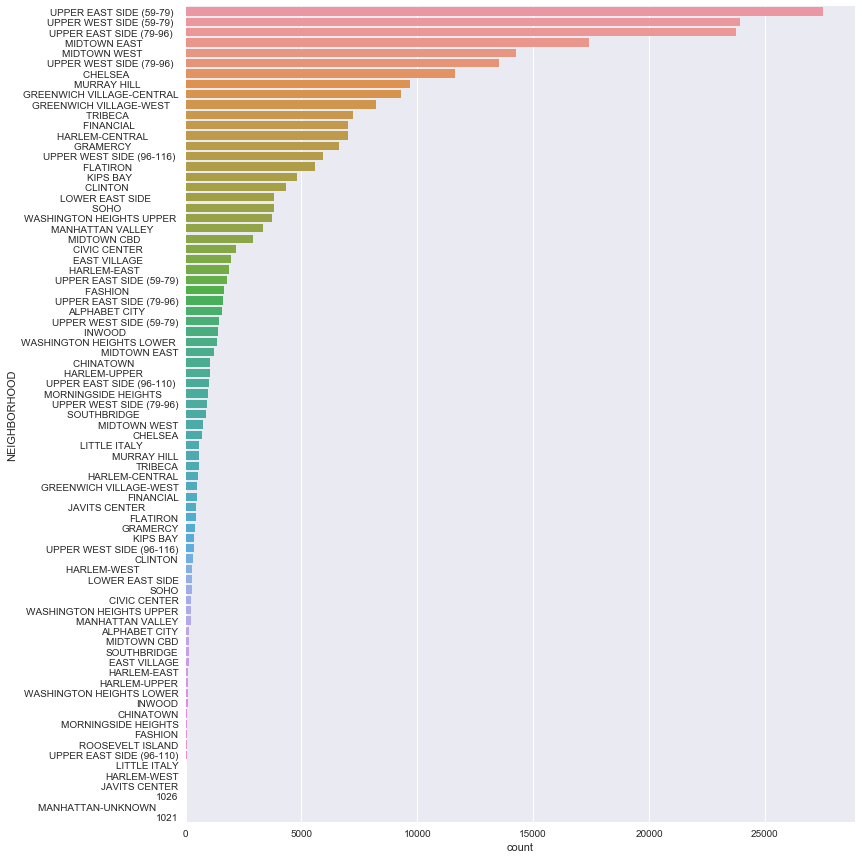

In [5]:
# look at the neighborhood distributions
sns.set(rc={'figure.figsize':(12,15)})
ax = sns.countplot(y="NEIGHBORHOOD", data=df_all,
              order = df_all['NEIGHBORHOOD'].value_counts().index)

we see majority of sales happen in Upper east/west side and Midtown

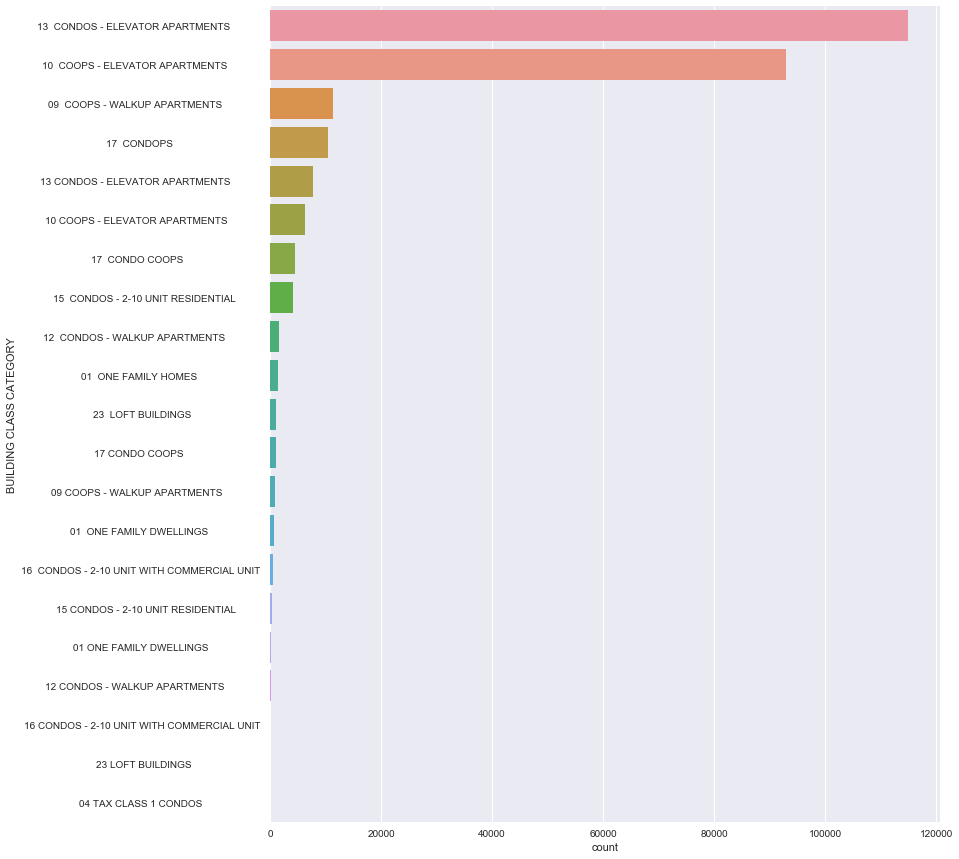

In [6]:
# look at the building class category distributions
sns.set(rc={'figure.figsize':(12,15)})
ax = sns.countplot(y="BUILDING CLASS CATEGORY", data=df_all,
              order = df_all['BUILDING CLASS CATEGORY'].value_counts().index)

We see most of the sales in NYC are elevator apartments, which is in line with people's needs nowadays

# CONDO transaction data only

In [7]:
# only need CONDO data
all_category = list(df_all['BUILDING CLASS CATEGORY'].unique())

In [8]:
# only check NYC condo
only_condo = [i for i in all_category if 'CONDO' in i and 'COOP' not in i and 'CONDOPS' not in i]

In [9]:
df_condo = df_all[df_all['BUILDING CLASS CATEGORY'].isin(only_condo)]

In [10]:
# Add unique identifier for condos: block + lot
col_block_lot = df_condo.apply(lambda row: str(row.BLOCK) + str(row.LOT), axis=1)
df_condo = df_condo.assign(IDENTIFIER=col_block_lot.values)

In [11]:
# remove the price outliers from the data -- 200k as minimum and 5 million as maximum 
df_condo = df_condo[df_condo['SALE PRICE'].between(200000, 10000000)]

# CONDO data research

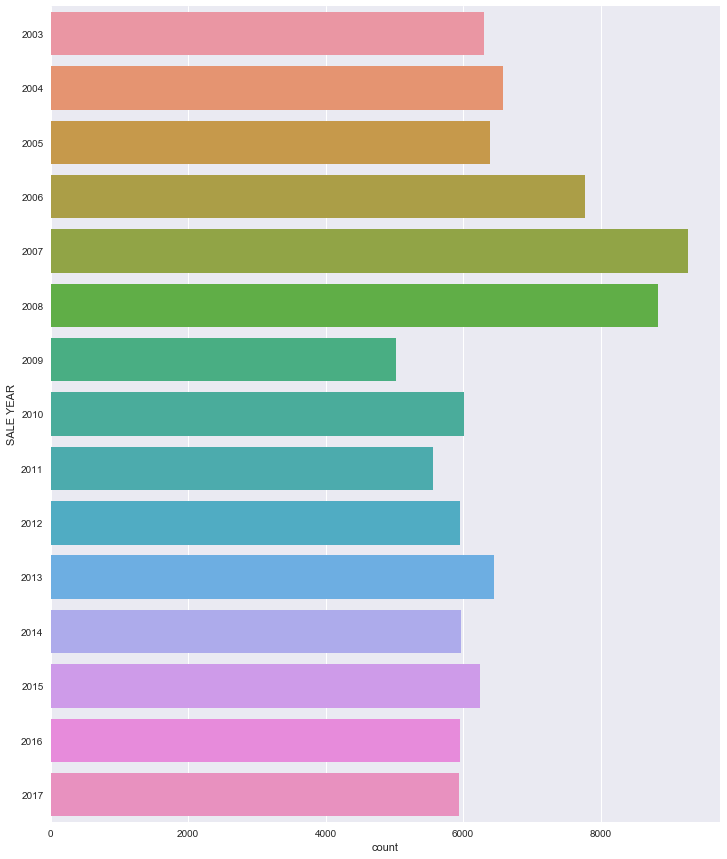

In [12]:
# plot the sales data by year
ax = sns.countplot(y="SALE YEAR", data=df_condo)

In [13]:
def plot_trend_by_year(df, col_plot, col_date):
    
    """
    This function helps plot the trend of the col_plot in dataframe df
    
    Input:
    df: dataframe used
    col_plot: the column which contains the variable to be plotted
    col_date: the groupby horizontal variable used. In most cases should be the time series variable
    
    Output: plot the trend of col_plot by col_date
    """
    df.groupby(col_date).mean()[col_plot].plot(figsize=(12, 8))
    

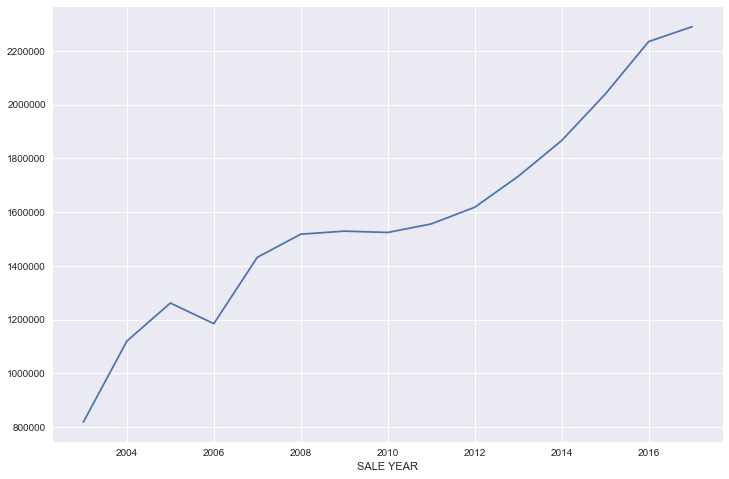

In [14]:
# plot the CONDO sales price by year
plot_trend_by_year(df_condo,'SALE PRICE','SALE YEAR')

Housing price dropped slightly from 2005 to 2006 and remain flat during credit crisis, but during all other periods it's been growing strongly. 

In [15]:
# Cclculate the price change for each apt
df_condo['price_change'] = df_condo.sort_values(['IDENTIFIER','SALE YEAR'],ascending=[True,True]).groupby(['IDENTIFIER'])['SALE PRICE'].apply(lambda x: x.pct_change())

In [16]:
# Cclculate the years past for each sale to take place
df_condo['year_pass'] = df_condo.sort_values(['IDENTIFIER','SALE YEAR'],ascending=[True,True]).groupby(['IDENTIFIER'])['SALE YEAR'].apply(lambda x: x.diff())

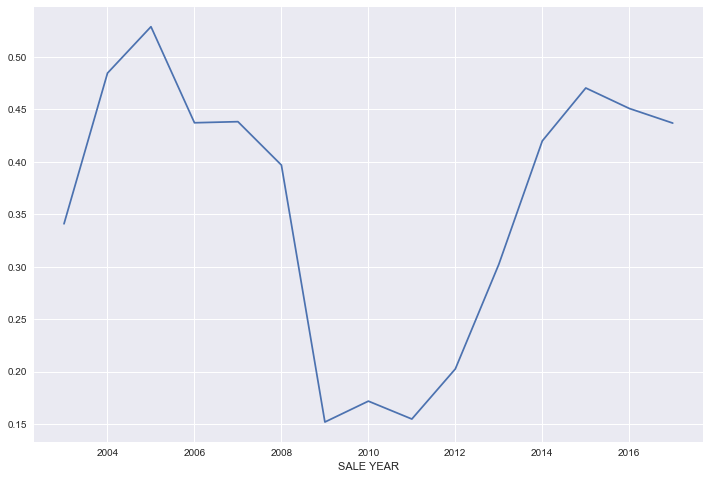

In [17]:
# plot the average CONDO sales price change by year
plot_trend_by_year(df_condo,'price_change','SALE YEAR')